## Ultimate Technologies Inc. Take Home Challenge
### By [Anthony Medina](https://www.linkedin.com/in/anthony-medina-math/)

### Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Open the JSON file for reading
with open('logins.json', 'r') as json_file:
    logins = json.load(json_file)
    df = pd.DataFrame(logins)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
print('Min:', df['login_time'].min())
print('Max:', df['login_time'].max())

Min: 1970-01-01 20:12:16
Max: 1970-04-13 18:57:38


In [4]:
df['login_time'] = pd.to_datetime(df['login_time'])
df.set_index('login_time', inplace=True)
df['count'] = 1

In [5]:
aggregated_df = df.resample('15T').count()

In [6]:
print(aggregated_df)

                     count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1
...                    ...
1970-04-13 17:45:00      5
1970-04-13 18:00:00      5
1970-04-13 18:15:00      2
1970-04-13 18:30:00      7
1970-04-13 18:45:00      6

[9788 rows x 1 columns]


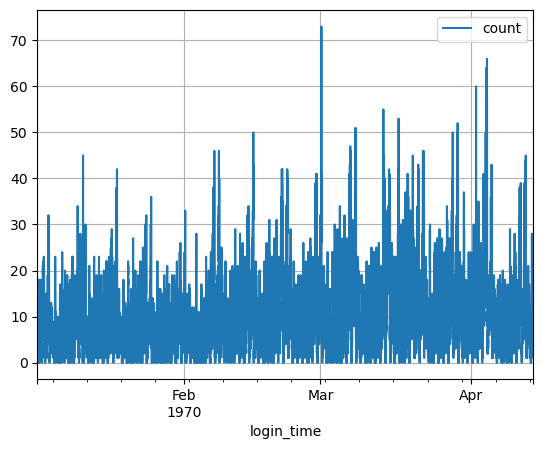

In [7]:
aggregated_df.plot(grid=True)
plt.show()

In [8]:
result = adfuller(aggregated_df)

In [9]:
print(result[1])

2.732396654222769e-18


In [10]:
# The results of the ADF says that this time series is stationary.

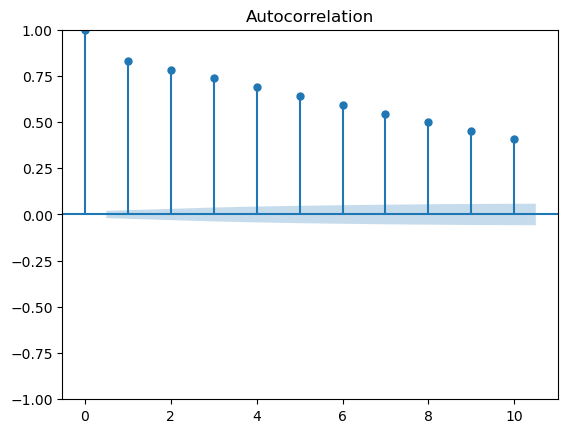

In [11]:
plot_acf(aggregated_df, lags=10)  # Set the number of lags to include in the plot
plt.show()

In [12]:
# This is positively correlated with itself. This supports that this is a seasonal time series.

### Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    1. how you will implement the experiment
    2. what statistical test(s) you will conduct to verify the significance of the observation
    3. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
_Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2._

### 1 The intention of proposed measure is to have drivers freely moving between the cities. The key measure of success would be to have drivers moving freely in between cities.

### 2A. Similar to the tax free weekends that start before the school year starts, the two cities could have a week or weekend where there are no tolls to move in between the cities. We have plenty of data **before** the experiment. This would allow us to collect data after the expiermient.

### 2B. The null hypothesis test for this would be "There is no change in driver behavior on a free-toll week and a regular week." We would then count the number of stops each driver made in each city before and after the weeks. We would then construct a confience interval around our hypothesis.

### 2C. Suppose there **is** a difference in traffic then we could encougarge movement between the cities by removing tolls altogether. A second option would to make the bridge toll-free during the week. A third option would be to remove tolls during the weekends.
### Suppose there **is not** a significant difference in the tolls during the experiment and after, we could conduct another experiment for a longer period of time or remove the tolls on the bridge altogether since the tolls isn't what is discouraging movement between the cities.

### Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

#### Data description
* **city**: city this user signed up in
* **phone**: primary device for this user
* **signup_date**: date of account registration; in the form ‘YYYYMMDD’
* **last_trip_date**: the last time this user completed a trip; in the form ‘YYYYMMDD’
* **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup
* **avg_rating_by_driver**: the rider’s average rating over all of their trips
* **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips
* **surge_pct**: the percent of trips taken with surge multiplier > 
* **avg_surge**: The average surge multiplier over all of this user’s trips
* **trips_in_first_30_days**: the number of trips this user took in the first 30 days after signing up
* **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* **weekday_pct**: the percent of the user’s trips occurring during a weekday

### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [13]:
with open('ultimate_data_challenge.json', 'r') as json_file:
    logins = json.load(json_file)
    df = pd.DataFrame(logins)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
# Let's take a look at the data
df.info

<bound method DataFrame.info of                  city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2   

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [16]:
# Let's take a look at the missing data
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)

missing.columns=['count', '%']
missing = missing.sort_values(by='count', ascending=False)
print(missing)

                        count       %
avg_rating_of_driver     8122  16.244
phone                     396   0.792
avg_rating_by_driver      201   0.402
city                        0   0.000
trips_in_first_30_days      0   0.000
signup_date                 0   0.000
avg_surge                   0   0.000
last_trip_date              0   0.000
surge_pct                   0   0.000
ultimate_black_user         0   0.000
weekday_pct                 0   0.000
avg_dist                    0   0.000


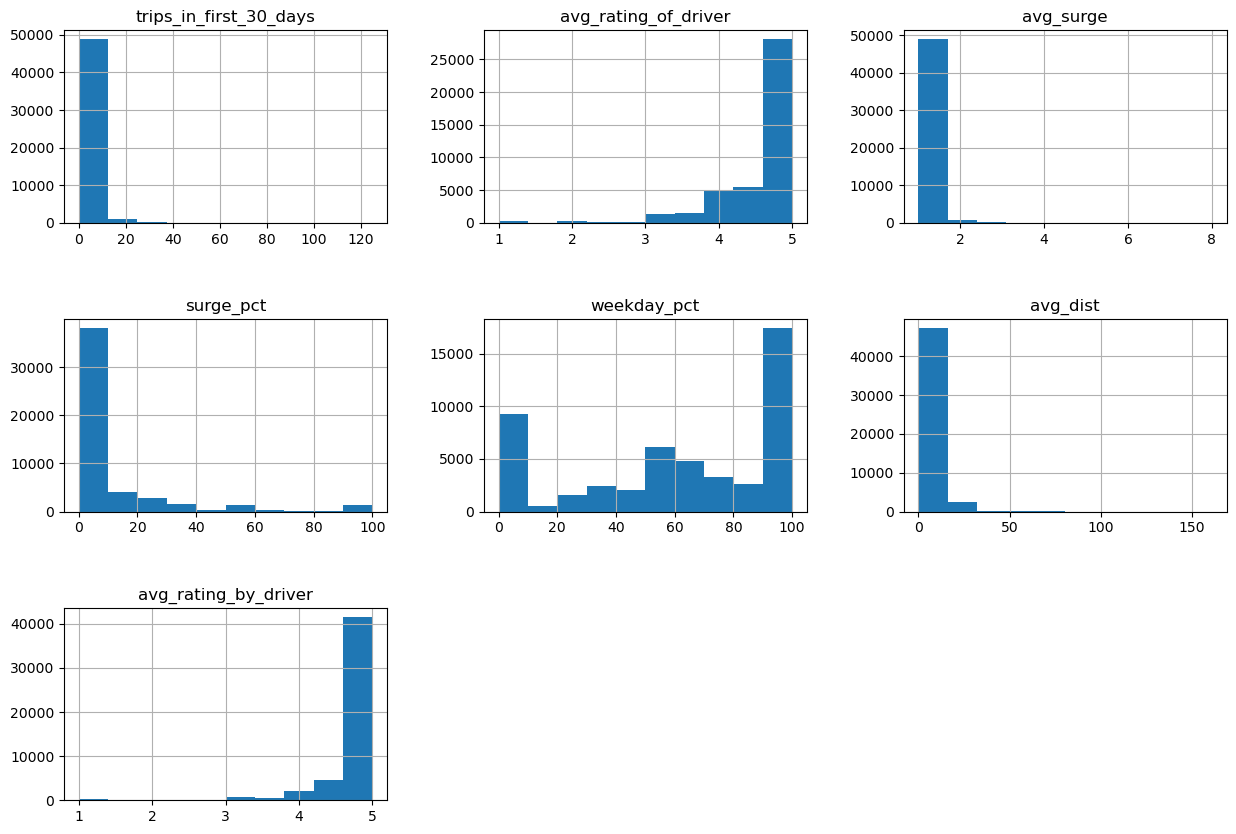

In [17]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

* We'll update avg_rating_of_driver with the average of the column.
* We'll remove the columns with null values
* We'll update the datetime column types
* We'll add a new column that is 1 if the difference between last_trip_date - signup_date is greater than 6 months

In [18]:
# We'll update the datetime column types
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [19]:
# We'll update avg_rating_of_driver with the average of the column.

# Find the average of non-null values
average = df['avg_rating_of_driver'].mean()
print(average)
average = round(average, 1)
print(average)
# Replace null values with the calculated average
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(average)

4.601559291274655
4.6


In [20]:
# We'll remove the records with missing phone 
df_cleaned = df.dropna()

In [21]:
# We'll add a column of the target variable
df_cleaned['MonthsDifference'] = (df_cleaned['last_trip_date'] - df_cleaned['signup_date']).dt.days / 30.0

# Add a column 'MoreThan6Months' with True/False values
df_cleaned['Active'] = np.where(df_cleaned['MonthsDifference'] > 5, True, False)

df_cleaned['Active'].head()

/var/folders/b0/x4p60r3n3dz3lbgp1_bgg05h0000gn/T/ipykernel_90342/3617165145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['MonthsDifference'] = (df_cleaned['last_trip_date'] - df_cleaned['signup_date']).dt.days / 30.0
/var/folders/b0/x4p60r3n3dz3lbgp1_bgg05h0000gn/T/ipykernel_90342/3617165145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Active'] = np.where(df_cleaned['MonthsDifference'] > 5, True, False)


0    False
1    False
2    False
3     True
4    False
Name: Active, dtype: bool

In [22]:
df_cleaned['Active'].value_counts()

False    37314
True     12092
Name: Active, dtype: int64

In [23]:
# Convert the column to integers
df_cleaned['Active'] = df_cleaned['Active'].astype(int)

/var/folders/b0/x4p60r3n3dz3lbgp1_bgg05h0000gn/T/ipykernel_90342/2660874304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Active'] = df_cleaned['Active'].astype(int)


In [24]:
# What fraction of the observed users were retained?
print( str(float(df_cleaned.shape[0]/50000.0) * 100) + '% of records were kept.')

98.812% of records were kept.


In [25]:
df_cleaned = df_cleaned.drop(columns=['MonthsDifference'])

### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [26]:
# Encoding Variables

In [27]:
# Encoding Categorical Values
encoded_df = pd.get_dummies(df_cleaned, columns=['city', 'phone', 'ultimate_black_user'], prefix=['color', 'phone', 'ultimate_black'])
encoded_df.head()

# Creating Features and Target Variables
columns_to_drop = ['signup_date', 'last_trip_date']
encoded_df = encoded_df.drop(columns=columns_to_drop)

X = encoded_df.drop(columns=['Active'])
y = encoded_df['Active']

In [28]:
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,color_Astapor,color_King's Landing,color_Winterfell,phone_Android,phone_iPhone,ultimate_black_False,ultimate_black_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0


In [ ]:
# Step 1: Data Preparation
# Load and preprocess your data
# X = features, y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Creation
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Step 3: Hyperparameter Tuning
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and retrain the model
best_params = grid_search.best_params_
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 5: Feature Importance
# Get feature importances
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)

### How valid is your model? Include any key indicators of model performance.
I used Accuracy for this model because there was a pretty even number of yes and no. There wasn't any reason that positives and negatives would cause issues.

The model is about 80% Accurate.

### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

The feature importance list tells us that the most important indicators were avg_surge, surge_pct, weekday_pct, and avg_rating_by_driver.

Ultimate should focus on encouraging customers to increase/maintain their surge. This appears to motivate riders to continue use.

In addition, it looks like riders during the week have a greater chance of using the app after 6 months. You could install some incentive to have riders increase their percentage of rides taken during the week.